In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr # for correlation analysis
from scipy.stats import linregress # for correlation analysis
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
projectPath = ('data/World Happiness Report.csv')

In [4]:
worldHappinessData = pd.read_csv(projectPath)
worldHappinessData


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703


In [5]:
worldHappinessData.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [6]:
# Number of countries.
country_count = len(worldHappinessData["Country Name"].unique())
country_count

165

In [7]:
# Remove duplicate rows
duplicates = worldHappinessData[worldHappinessData.duplicated(['Country Name', 'Year'])]
if len(duplicates) == 0:
    print("No duplicate rows.")
else:
    print("Duplicate rows")
    display(duplicates)

No duplicate rows.


In [42]:
# shorten really long country names
worldHappinessData.replace(to_replace='Central African Republic', value="C. African Rep.", inplace=True)
worldHappinessData[worldHappinessData['Country Name'] == "C. African Rep."]

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
344,C. African Rep.,NaN,2007,4.160130,6.945774,0.532297,41.480000,0.662871,0.082950,0.782131,0.566929,0.329995,0.623566
345,C. African Rep.,NaN,2010,3.567893,7.030766,0.483334,42.500000,0.689951,-0.032762,0.845377,0.477915,0.256705,0.752209
346,C. African Rep.,NaN,2011,3.677826,7.056533,0.387391,42.840000,0.780018,-0.012097,0.834499,0.501873,0.277180,0.783858
347,C. African Rep.,NaN,2016,2.693061,6.707346,0.290184,44.750000,0.624057,0.037318,0.859073,0.550785,0.494268,0.748755
348,C. African Rep.,NaN,2017,3.475862,6.732925,0.319589,45.299999,0.645252,0.077883,0.889566,0.602205,0.599335,0.650285


In [43]:
averagesData =  worldHappinessData.groupby(['Country Name']).mean()
averagesData = averagesData.drop('Year', axis=1)
averagesSorted = averagesData.sort_values(by=['Life Ladder'],ascending=False)
averagesSorted.reset_index(inplace=True)
averagesSorted

,Country Name,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Denmark,7.673428,10.890561,0.957257,70.110588,0.943526,0.168008,0.198935,0.783842,0.198059,0.578037
1,Finland,7.619146,10.758259,0.952087,70.385334,0.942529,0.003297,0.241205,0.738976,0.185973,0.596645
2,Norway,7.481820,11.063554,0.948174,70.983334,0.951594,0.137959,0.334880,0.784108,0.201887,0.675312
3,Switzerland,7.474483,11.134667,0.937606,72.071666,0.917081,0.095792,0.298382,0.752893,0.188694,0.770718
4,Iceland,7.458607,10.882260,0.978529,71.842500,0.931095,0.249913,0.696371,0.806559,0.163893,0.428385
...,...,...,...,...,...,...,...,...,...,...,...
160,Rwanda,3.654473,7.427593,0.619421,57.570833,0.868012,0.012766,0.185955,0.692553,0.223807,0.969535
161,Burundi,3.548124,6.682296,0.417652,52.008000,0.451014,-0.034613,0.732270,0.570199,0.244124,0.725120
162,C. African Rep.,3.514954,6.894669,0.402559,43.374000,0.680430,0.030658,0.842129,0.539942,0.391497,0.711735
163,South Sudan,3.401875,NaN,0.554719,53.101250,0.493705,NaN,0.749433,0.572469,0.486184,0.468385


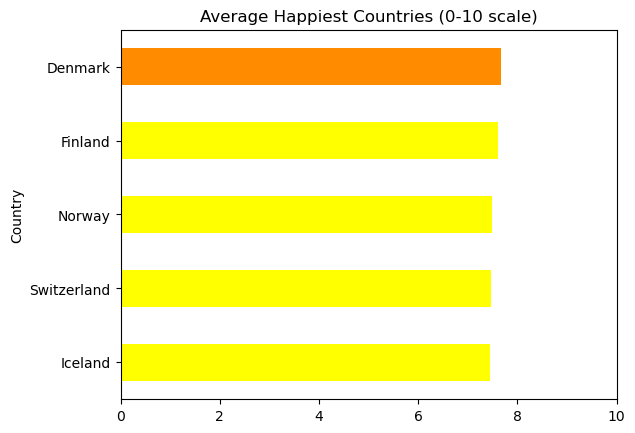

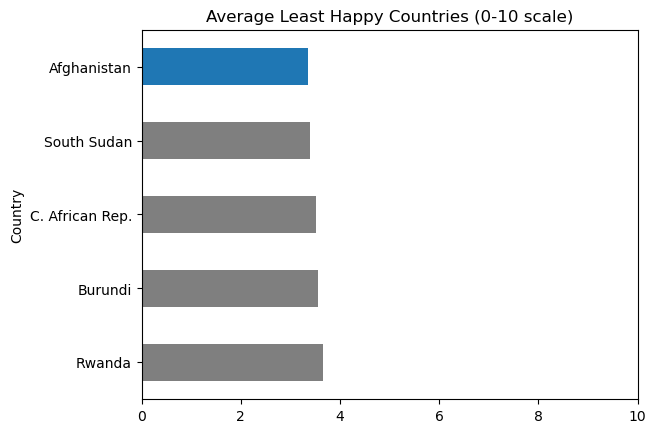

In [44]:
# graph the highest and lowest 5 average happiness scores
top_colors = ['yellow','yellow','yellow','yellow', 'darkorange']
bottom_colors = ['tab:gray','tab:gray','tab:gray','tab:gray','tab:blue']
ret = averagesSorted.iloc[0:5].sort_values(by='Life Ladder').plot(kind="barh", color=top_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title="Average Happiest Countries (0-10 scale)",xlim=[0,10])
plt.savefig("Output/AverageHappiestTop5")
ret = averagesSorted.iloc[-5:].plot(kind="barh", color=bottom_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title="Average Least Happy Countries (0-10 scale)",xlim=[0,10])
plt.savefig("Output/AverageHappiestBottom5")

In [45]:
# rank the top five and the bottom five by year and graph
ranksByYear = {}
years = sorted(worldHappinessData['Year'].unique().tolist())

# get the top five and bottom five countries based on Life Ladder by Year
for year in years:
    thisYear = worldHappinessData[worldHappinessData['Year'] == year].sort_values('Life Ladder',ascending=False)
    thisYearSubset = thisYear[['Country Name','Life Ladder']]
    ranksByYear[year] = pd.concat([thisYearSubset.iloc[0:5],thisYearSubset.iloc[-5:]], ignore_index=True)

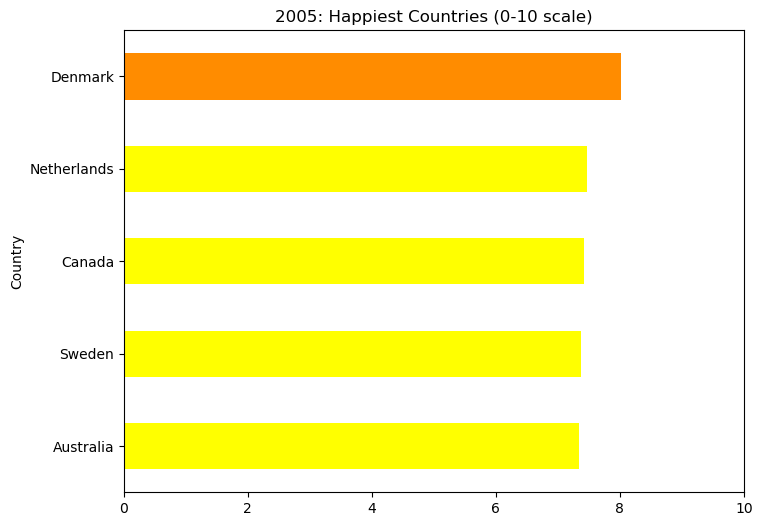

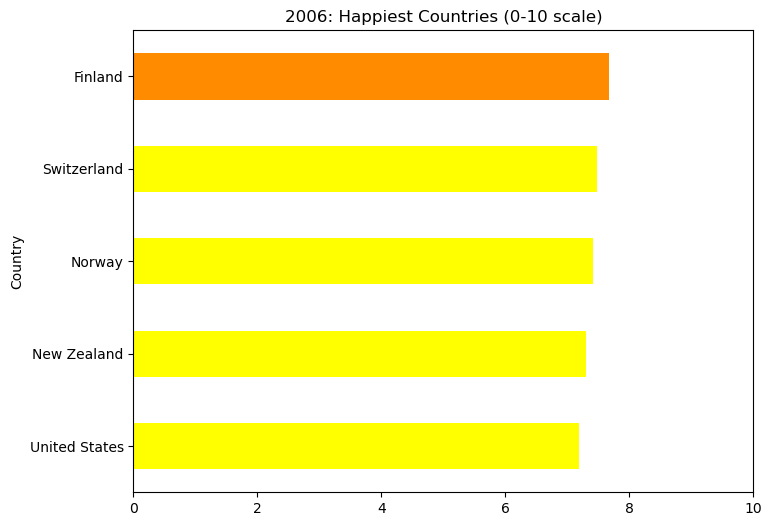

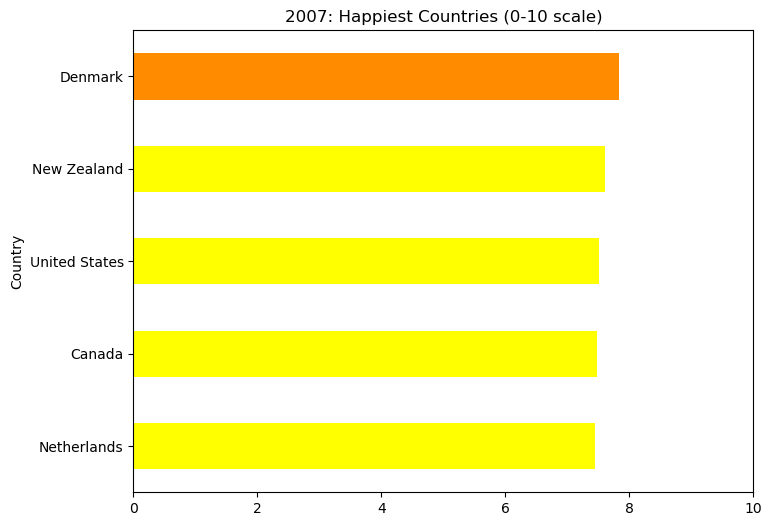

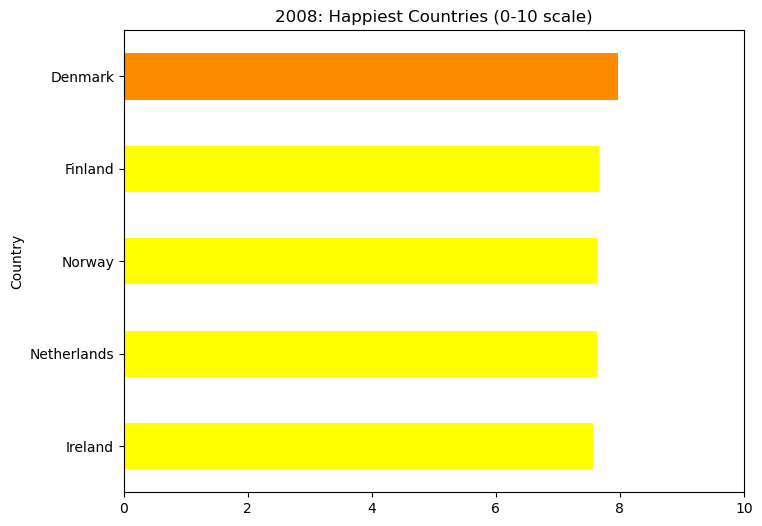

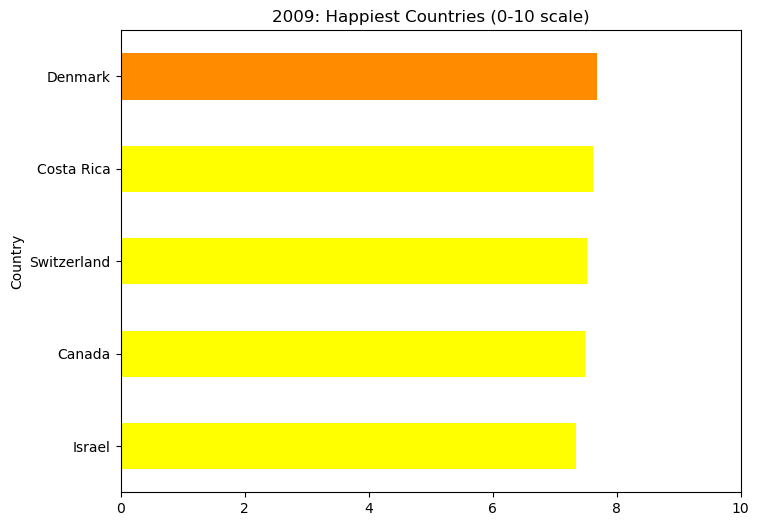

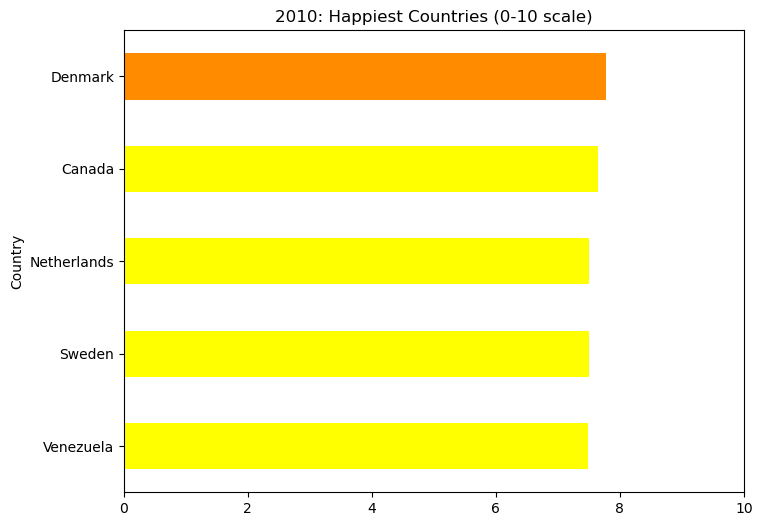

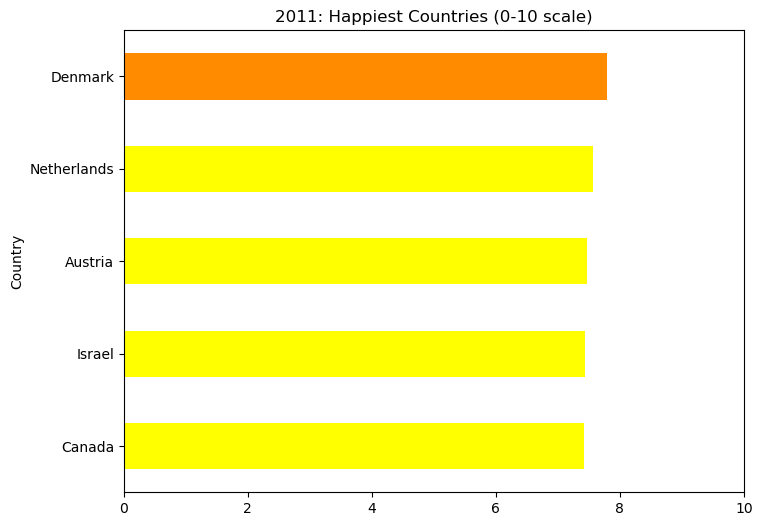

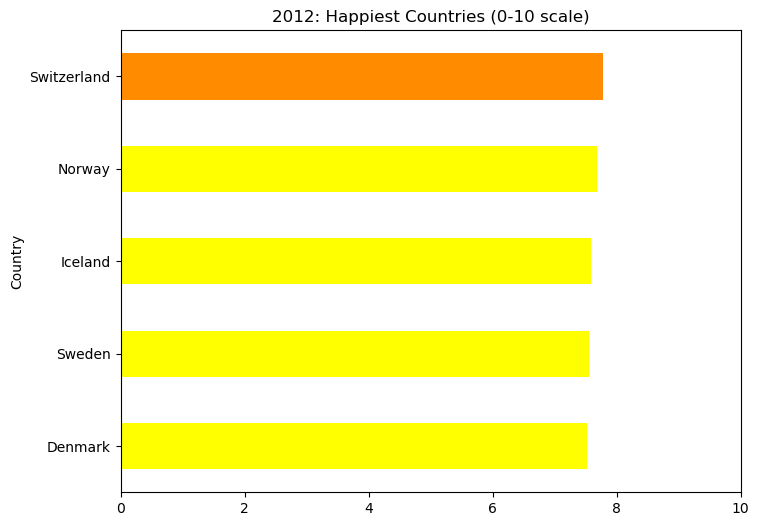

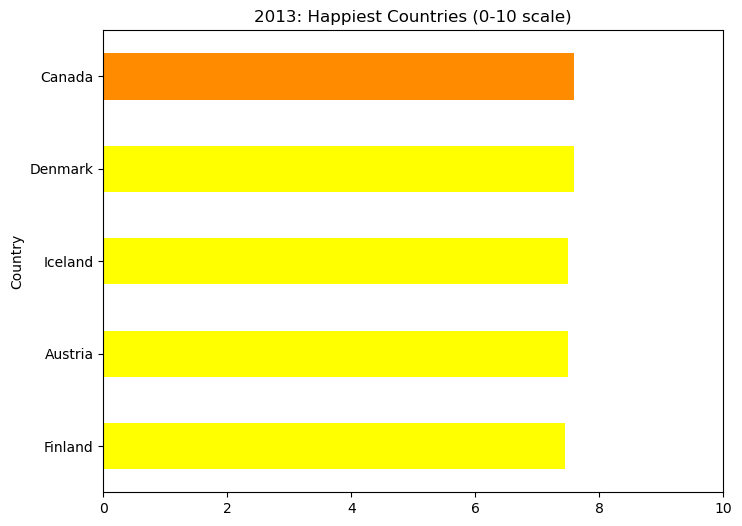

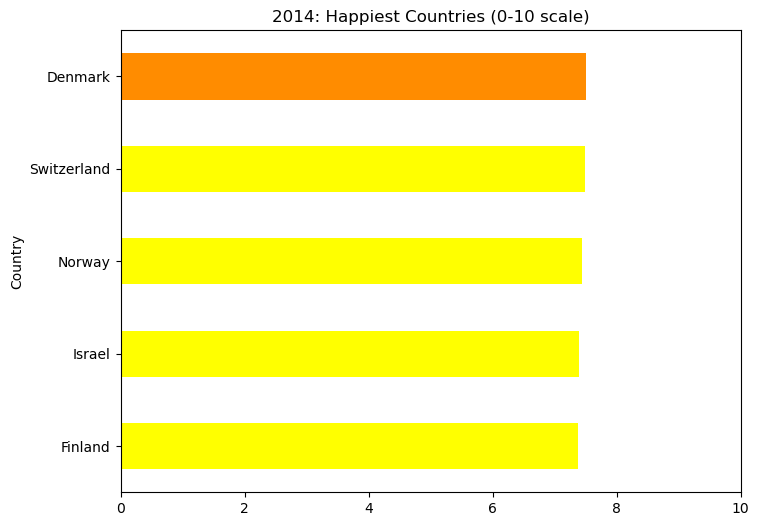

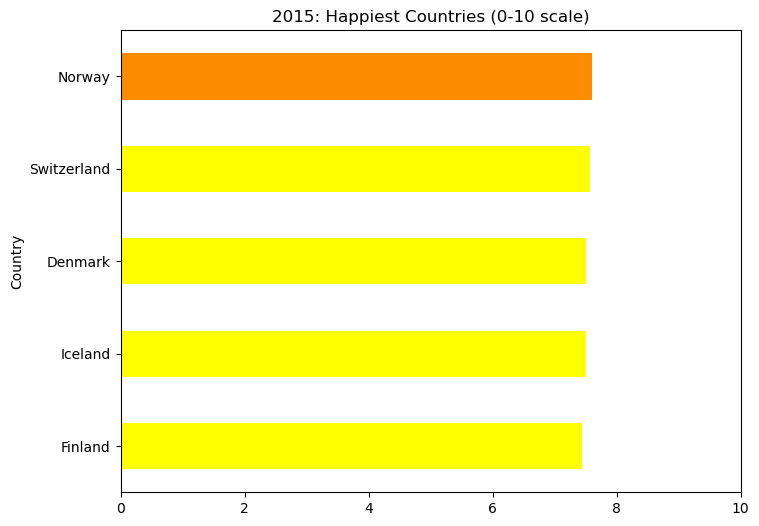

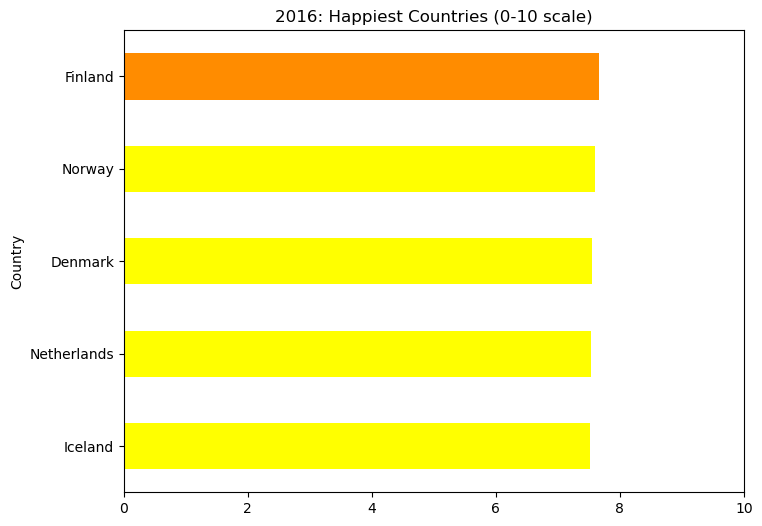

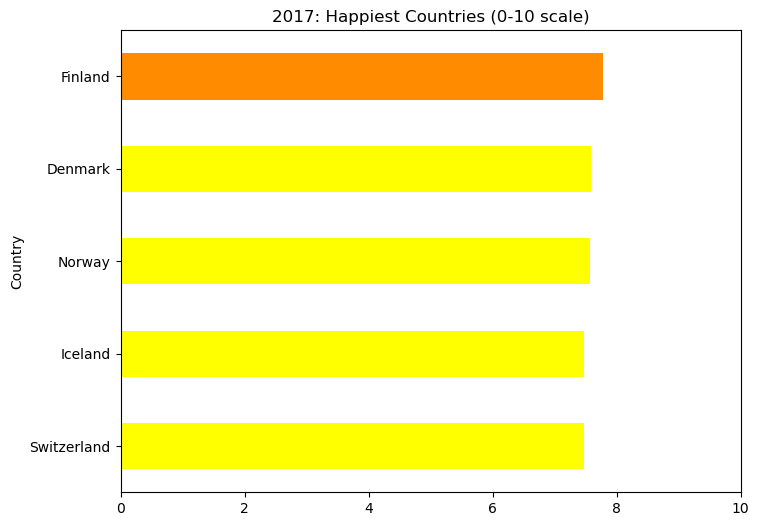

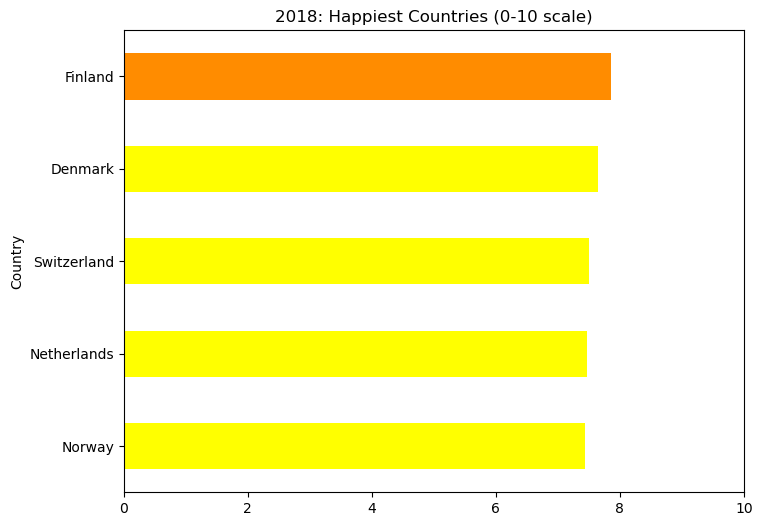

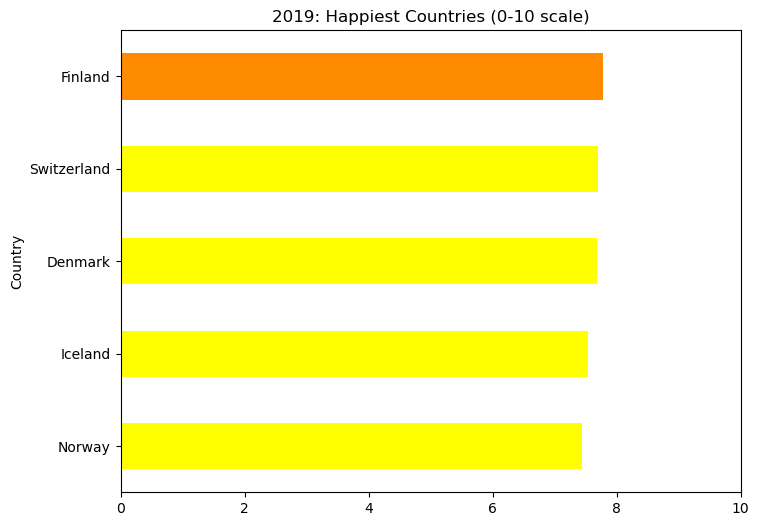

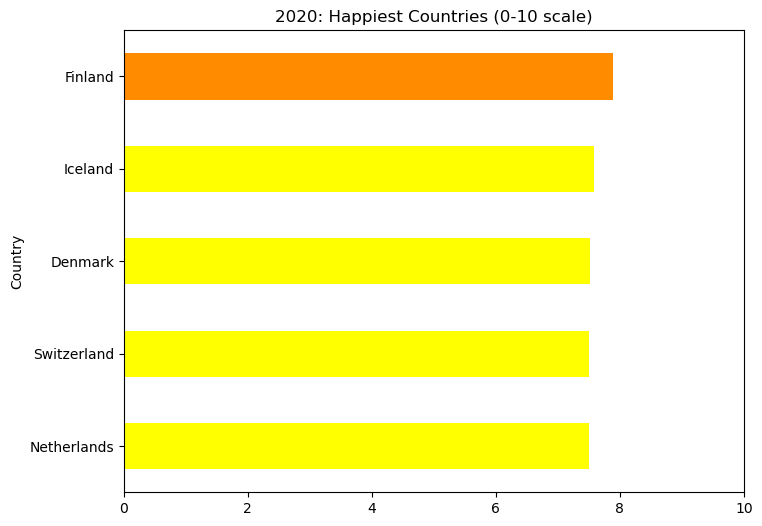

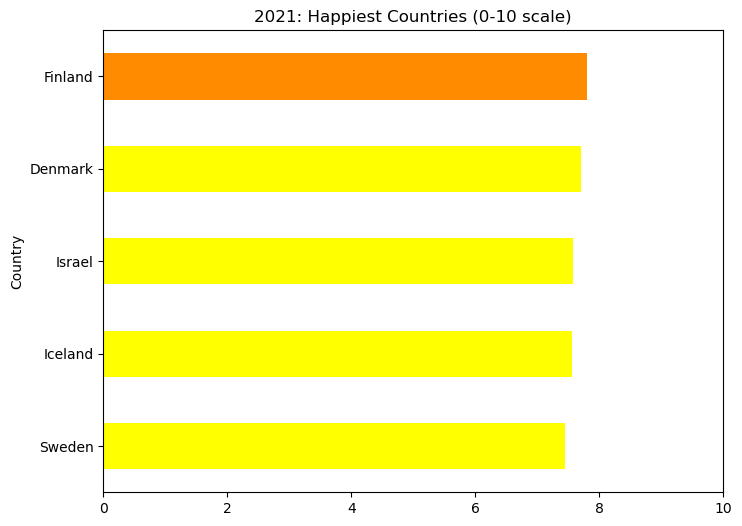

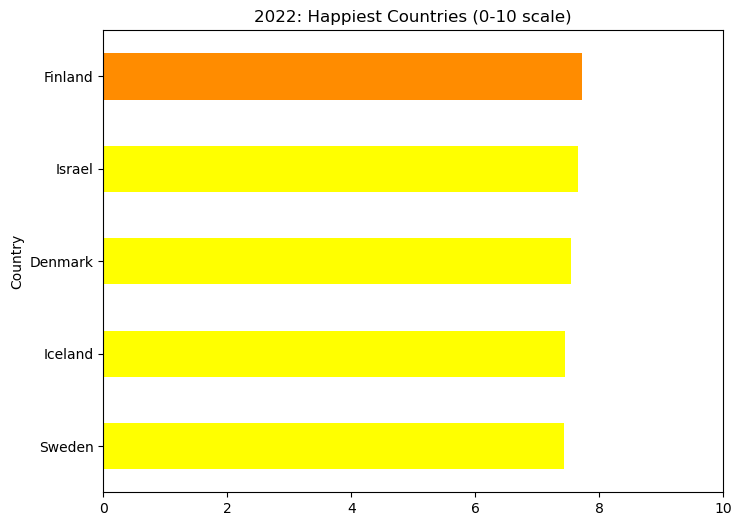

In [46]:
figure_size = (8,6)
for year in years:  
    ret = ranksByYear[year].iloc[0:5].sort_values(by='Life Ladder').plot(kind="barh", color=top_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title= str(year) + ": Happiest Countries (0-10 scale)",xlim=[0,10],figsize=figure_size)
    filename = str(year) + "HappiestTop5"
    ret = plt.savefig("Output/" + filename)

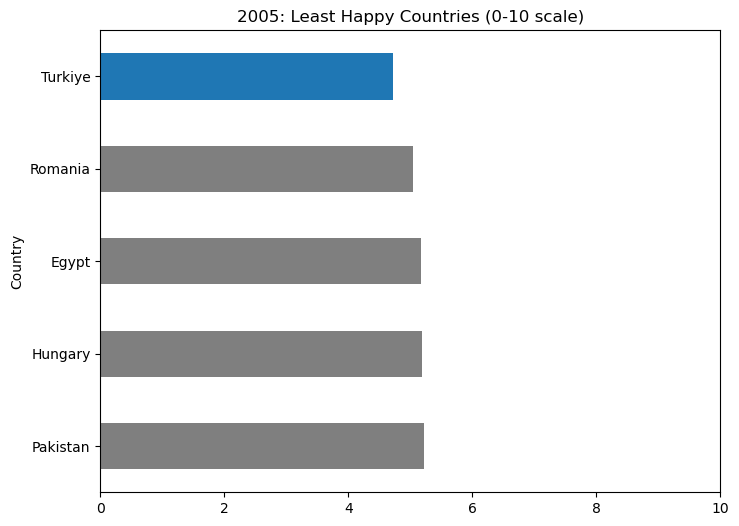

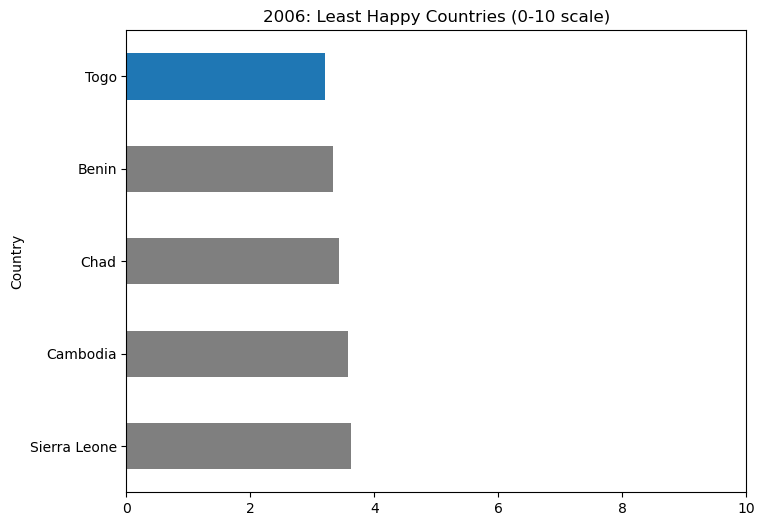

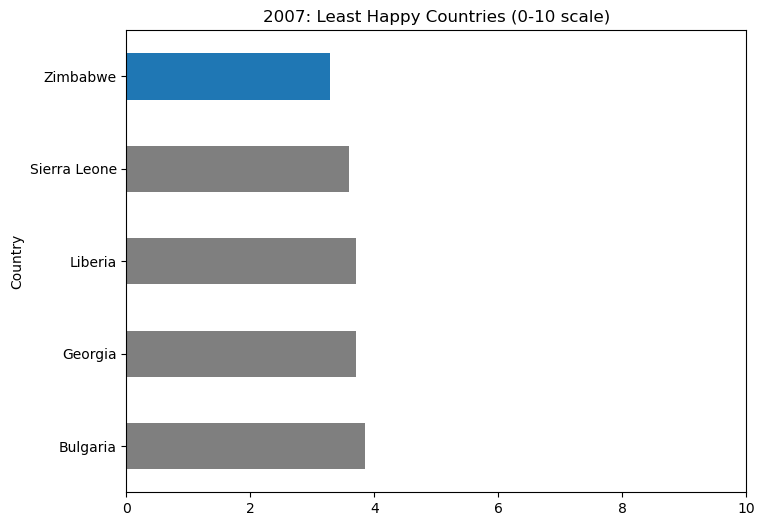

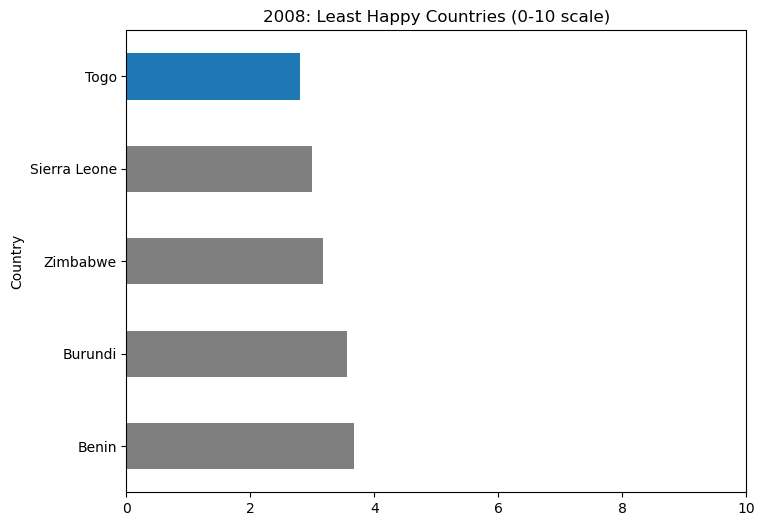

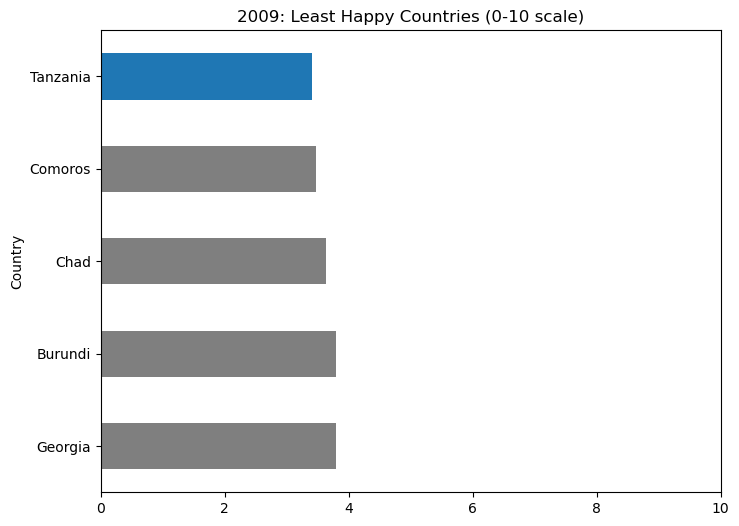

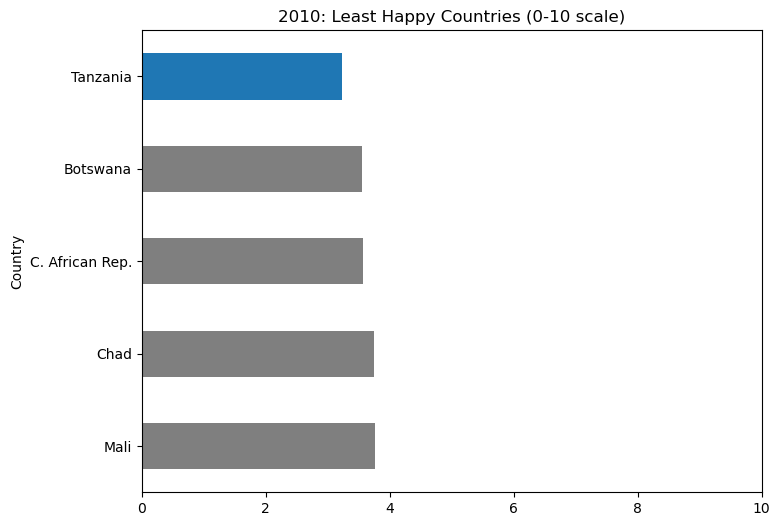

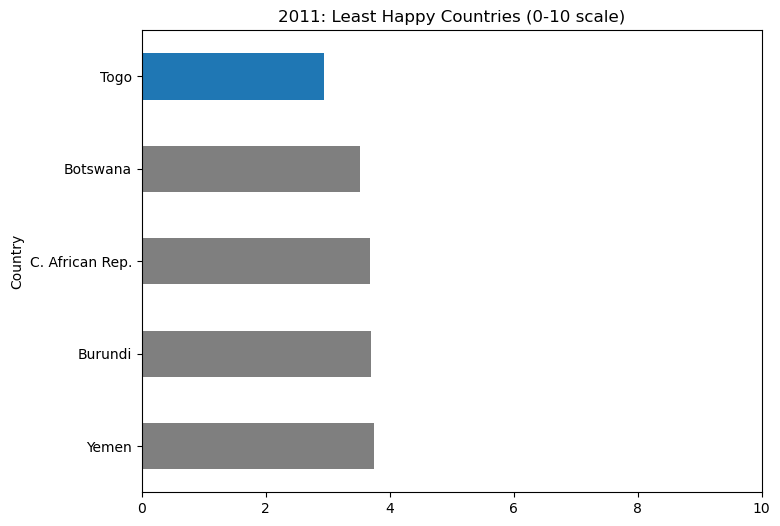

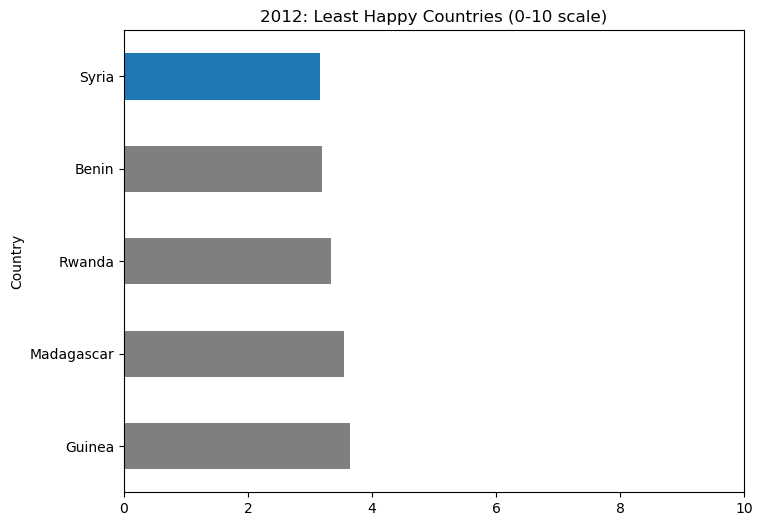

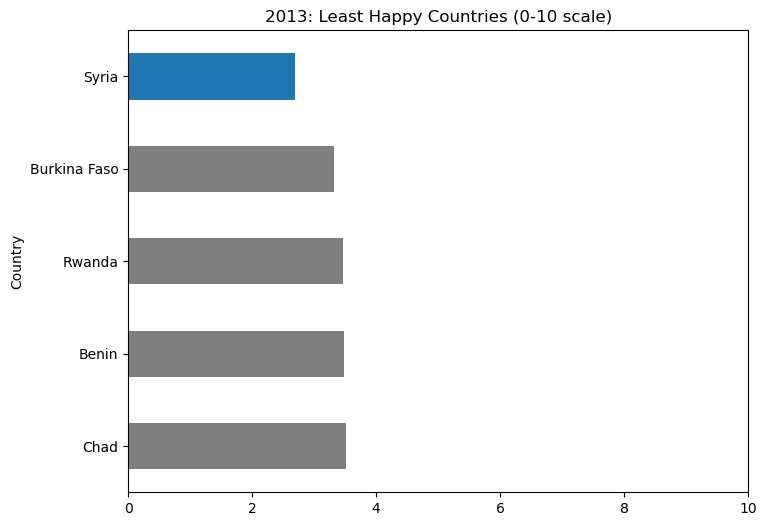

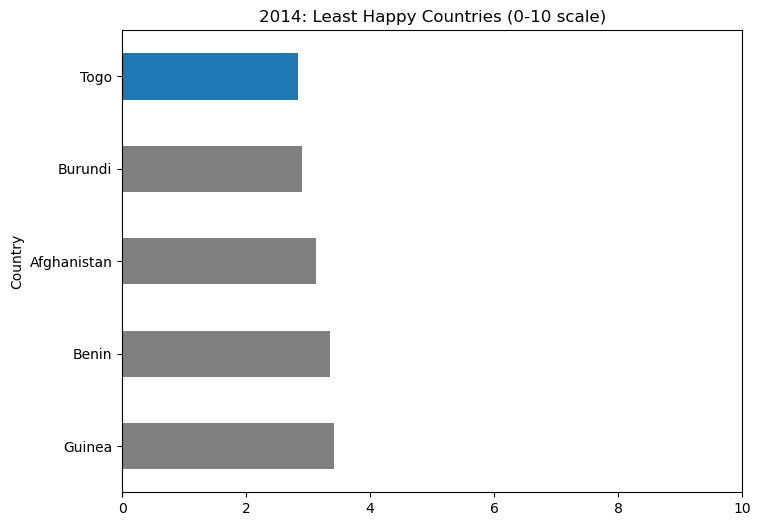

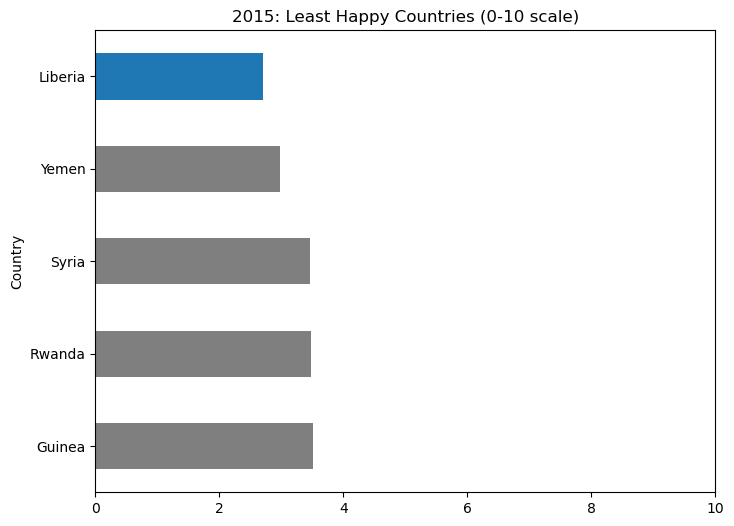

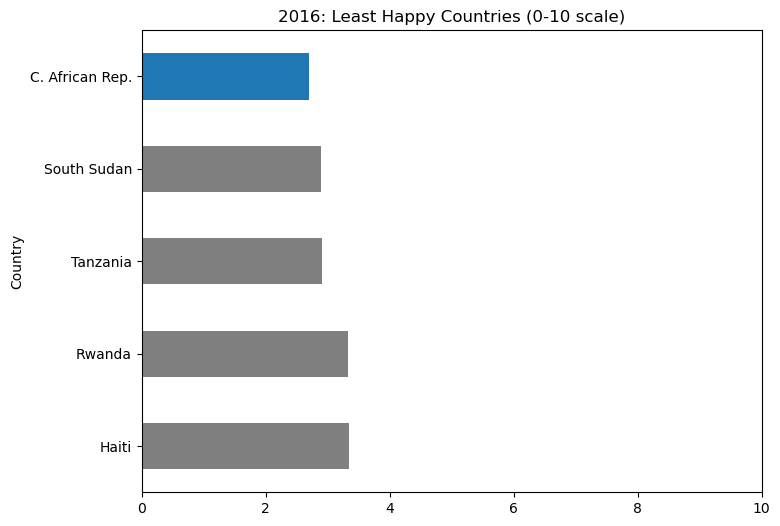

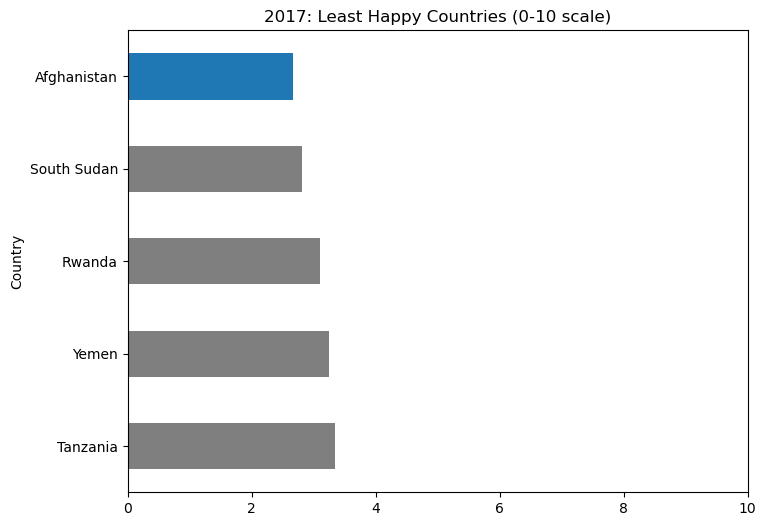

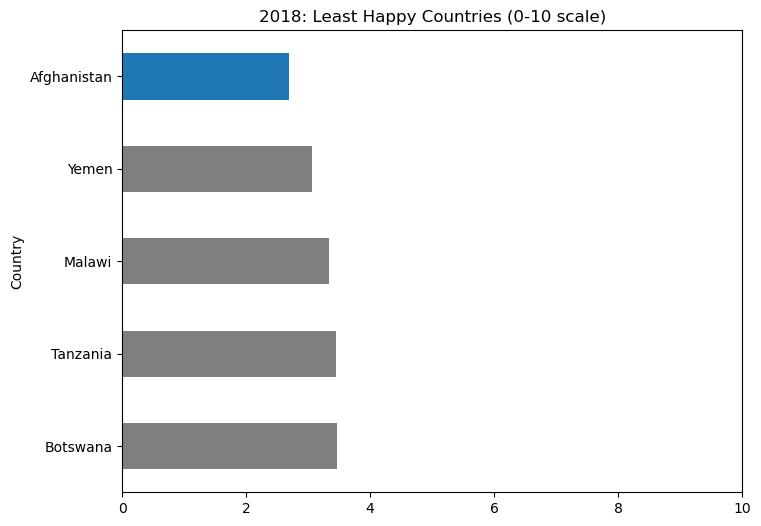

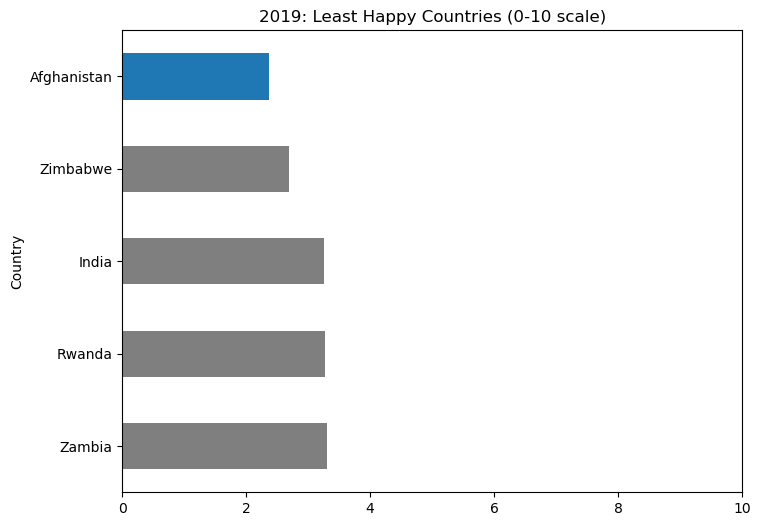

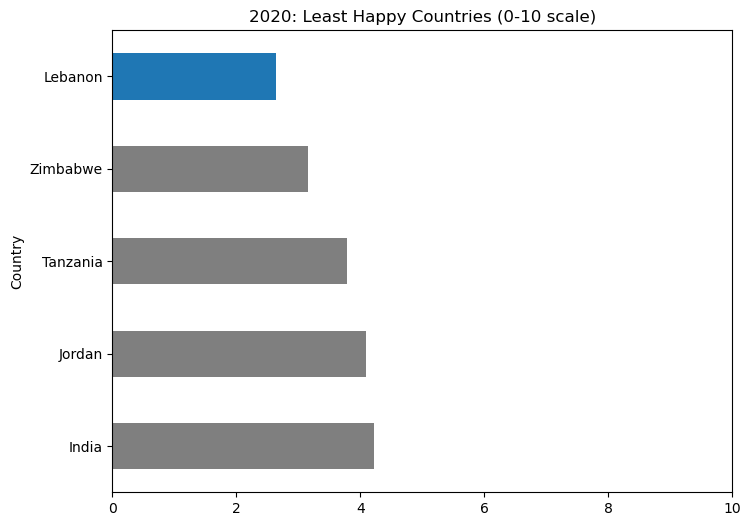

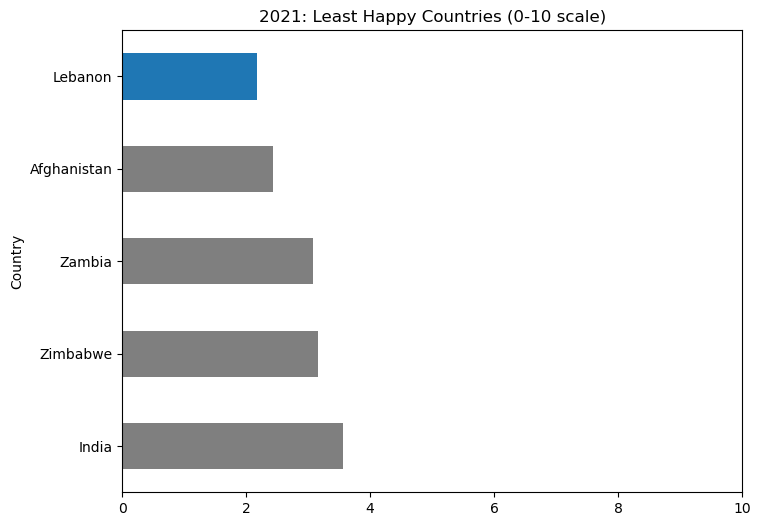

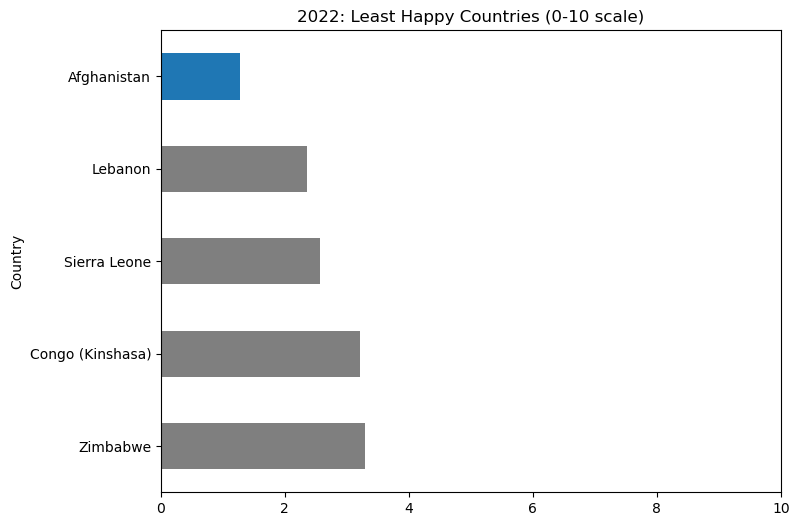

In [47]:
for year in years: 
    ax = ranksByYear[year].iloc[-5:].plot(kind="barh", color=bottom_colors, x='Country Name', y='Life Ladder', xlabel='Country',ylabel='Happiness Score (0-10)', legend=False, title= str(year)+": Least Happy Countries (0-10 scale)",xlim=[0,10],figsize=figure_size)
    filename = str(year) + "HappiestBottom5"
    plt.savefig("Output/" + filename)

In [13]:
# Look for countries with the the biggest changes in happiness scores
# Look for largest fluctuation, postive and negative, anywhere within the years 
# and the largest fluctuation, positive and negative, from first survey to last survey
happinessAgg = pd.DataFrame()
happinessAgg["Max"] = worldHappinessData.groupby(["Country Name"]).max()["Life Ladder"]
happinessAgg["Min"] = worldHappinessData.groupby(["Country Name"]).min()["Life Ladder"]
happinessAgg['Participation'] = worldHappinessData.groupby(["Country Name"]).size()

In [14]:
# drop all rows with 5 years or less of participation
indexDrop = happinessAgg[happinessAgg['Participation'] <= 5].index
happinessAgg.drop(indexDrop , inplace=True)


In [15]:
#find the year of the Max and Min happiness scores and the delta between max and min
#find the delta from first survey year to last survey year
maxYear = []
minYear = []
delta = []
endToEndDelta = []
countries = happinessAgg.index.tolist()
for country in countries:   
    country_max = happinessAgg.loc[[country]]['Max'][0]
    country_min = happinessAgg.loc[[country]]['Min'][0]
    max_year = worldHappinessData.loc[(worldHappinessData['Country Name'] == country) & (worldHappinessData['Life Ladder'] == country_max)]['Year'].iloc[0]
    min_year = worldHappinessData.loc[(worldHappinessData['Country Name'] == country) & (worldHappinessData['Life Ladder'] == country_min)]['Year'].iloc[0]
    country_rows = worldHappinessData[(worldHappinessData['Country Name'] == country)].sort_values(by='Year')
    first_year = country_rows.iloc[0]['Life Ladder']
    last_year = country_rows.iloc[-1]['Life Ladder']
    maxYear.append(max_year)
    minYear.append(min_year) 
    if max_year < min_year:
        delta.append(-(country_max - country_min))
    else:
        delta.append(country_max - country_min)
    endToEndDelta.append(last_year - first_year)
    
# add the new columns
happinessAgg['Min Year'] = minYear
happinessAgg['Max Year'] = maxYear
happinessAgg['Max Delta'] = delta
happinessAgg['End To End Delta'] = endToEndDelta

In [16]:
happinessAgg

,Max,Min,Participation,Min Year,Max Year,Max Delta,End To End Delta
Country Name,,,,,,,
Afghanistan,4.758381,1.281271,14,2022,2010,-3.477110,-2.442319
Albania,5.867422,4.511101,15,2016,2011,-1.356321,0.577961
Algeria,6.354898,4.744627,10,2019,2014,-1.610271,-0.246549
Argentina,6.775805,5.792797,17,2018,2011,-0.983009,-0.051932
Armenia,5.488087,4.177582,16,2009,2019,1.310505,1.092632
...,...,...,...,...,...,...,...
Venezuela,7.478455,4.041115,17,2016,2010,-3.437340,-1.220629
Vietnam,6.266509,5.022699,17,2013,2022,1.243810,0.972849
Yemen,4.809259,2.982674,12,2015,2009,-1.826585,-0.280220


2012 2018


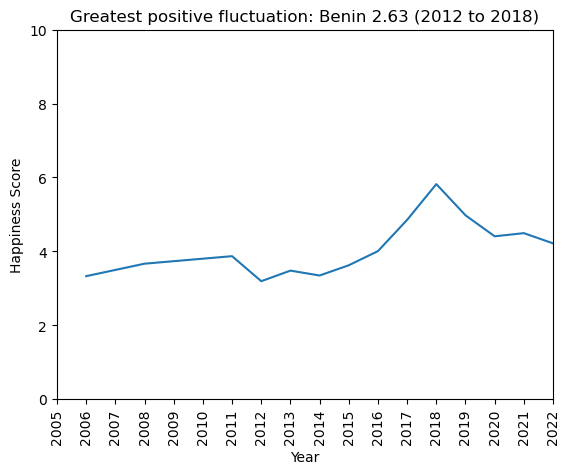

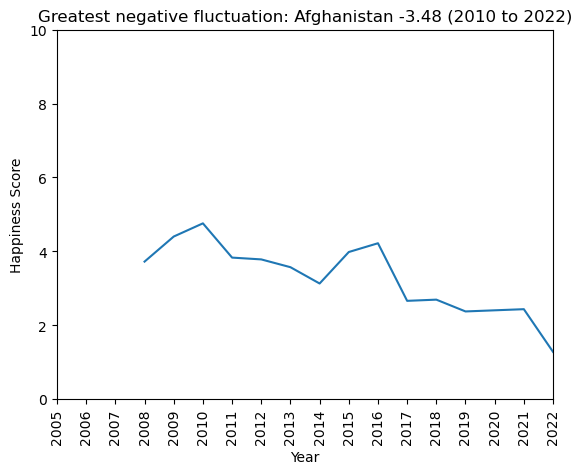

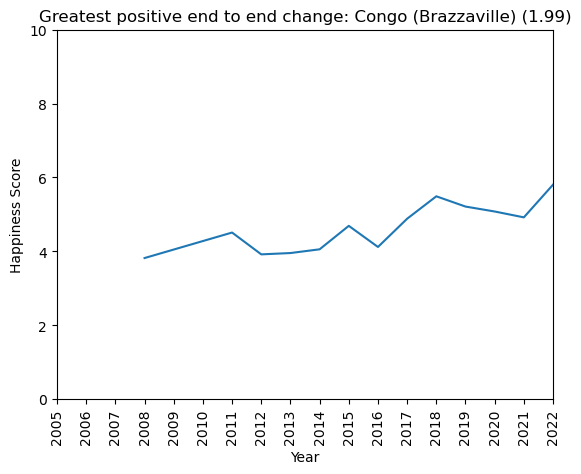

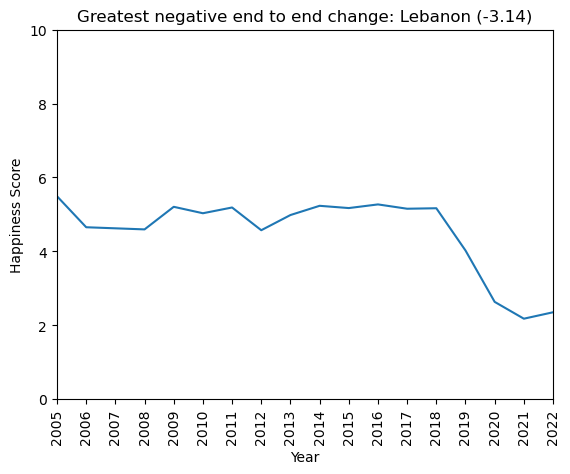

In [17]:
def happinessEndToEndLineGraph(country, deltaValue, filename):
    # draw a line graph of the happiness score for the country over time
    # deltaValue is the magnitude and direction of the change
    # filename is the name of the file to save a copy of the graph
    
   
    # this is a maximum delta
    if (deltaValue > 0):
        # positive change
        title = "Greatest positive end to end change: "
    else:
        # negative change
        title = "Greatest negative end to end change: "
   
    # create graph
    delta_str = f"{deltaValue:.2f}"
    title = title + country + " (" + delta_str + ")"
    ax = worldHappinessData[worldHappinessData['Country Name'] == country].plot(kind="line",x='Year',y='Life Ladder', title=title,ylim = [0,10],xlim=[2005,2022],legend=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Happiness Score')
    ax.set_xticks(range(2005, 2023))
    plt.xticks(rotation=90)
    plt.savefig("Output/" + filename)
    
def happinessFluctuationLineGraph(country, maxYear, minYear, deltaValue, filename):
    # draw a line graph of the happiness score for the country over time
    # maxYear is the high point
    # minYear is the low point
    # deltaValue is the magnitude and direction of the change
    # filename is the name of the file to save a copy of the graph
    
    
    # this is an internal delta
    if (deltaValue > 0):
        # positive end to end
        title = "Greatest positive fluctuation: "
        first_year = str(minYear)
        last_year = str(maxYear)
    else:
        # negative end to end
        title = "Greatest negative fluctuation: "
        first_year = str(maxYear)
        last_year = str(minYear)
    # create graph
    delta_str = f"{deltaValue:.2f}"
    title = title + country + " " + delta_str + " (" + first_year + " to " + last_year + ")"
    ax = worldHappinessData[worldHappinessData['Country Name'] == country].plot(kind="line",x='Year',y='Life Ladder', title=title,ylim = [0,10],xlim=[2005,2022],legend=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Happiness Score')
    ax.set_xticks(range(2005, 2023))
    plt.xticks(rotation=90)
    plt.savefig("Output/" + filename)
    
# make a Happiness score graph of the countries with the biggest changes over time, both by magnitude anywhere in the years
# and by magnitude from the first year of the survey to the last year of the survey

delta = happinessAgg['Max Delta'].max()
country = happinessAgg.index[happinessAgg['Max Delta'] == delta].tolist()[0]
minYear = int(happinessAgg.loc[country]['Min Year'])
maxYear = int(happinessAgg.loc[country]['Max Year'])
print(minYear,maxYear)
happinessFluctuationLineGraph(country, maxYear, minYear, delta, "maxPosDelta.png")
delta = happinessAgg['Max Delta'].min()
country = happinessAgg.index[happinessAgg['Max Delta'] == delta].tolist()[0]
minYear = int(happinessAgg.loc[country]['Min Year'])
maxYear = int(happinessAgg.loc[country]['Max Year'])
happinessFluctuationLineGraph(country, maxYear, minYear, delta, "maxNegDelta.png")
delta = happinessAgg['End To End Delta'].max()
country = happinessAgg.index[happinessAgg['End To End Delta'] == delta].tolist()[0]
happinessEndToEndLineGraph(country, delta, "maxPosEndToEnd.png")
delta = happinessAgg['End To End Delta'].min()
country = happinessAgg.index[happinessAgg['End To End Delta'] == delta].tolist()[0]
happinessEndToEndLineGraph(country, delta, "maxNegEndToEnd.png")

In [18]:
#Analysis of negative and positive affect
# Extract the desired columns from whr_df
columns_to_keep = ['Country Name', 'Year', 'Life Ladder', 'Positive Affect', 'Negative Affect']
affect_df = worldHappinessData[columns_to_keep].copy()

# Rename 'Life Ladder' to 'Happiness Score'
affect_df.rename(columns={'Life Ladder': 'Happiness Score'}, inplace=True)

# Create a new column 'Affect Difference' as the difference between 'Positive Affect' and 'Negative Affect'
affect_df['Affect Difference'] = affect_df['Positive Affect'] - affect_df['Negative Affect']
affect_df

# Group data by country
grouped_affect_df = affect_df.groupby('Country Name')

# Filter out countries with less than 5 years of data
affect_df_filtered = grouped_affect_df.filter(lambda x: len(x) >= 5)

affect_df_filtered

affect_avg_df = affect_df_filtered.groupby('Country Name').mean().reset_index()
affect_avg_df

,Country Name,Year,Happiness Score,Positive Affect,Negative Affect,Affect Difference
0,Afghanistan,2014.642857,3.346632,0.433324,0.364459,0.068865
1,Albania,2014.933333,5.048016,0.557358,0.293262,0.264096
2,Algeria,2015.800000,5.377251,0.535673,0.267095,0.268578
3,Argentina,2014.000000,6.283633,0.739047,0.287630,0.451416
4,Armenia,2013.625000,4.617078,0.497932,0.444081,0.053850
...,...,...,...,...,...,...
145,Venezuela,2013.882353,5.961915,0.775159,0.269507,0.505652
146,Vietnam,2014.000000,5.385371,0.617444,0.209997,0.407176
147,Yemen,2013.416667,3.912124,0.458260,0.293548,0.164712
148,Zambia,2013.733333,4.453841,0.678728,0.297978,0.380750


In [19]:
#Data Analysis

# Aggregate the data by country and year
affect_agg = affect_avg_df.groupby(['Country Name', 'Year']).mean().reset_index()

# Group by country and calculate average happiness score over the period
country_scores = affect_avg_df.groupby('Country Name')['Happiness Score'].mean()

# Get top 10 and bottom 10 countries based on average happiness score
top_countries = country_scores.nlargest(10).index.tolist()
bottom_countries = country_scores.nsmallest(10).index.tolist()

# Create a new dataframe with only the top and bottom countries
affect_df_subset = affect_avg_df.loc[affect_avg_df['Country Name'].isin(top_countries + bottom_countries)]

affect_df_subset

,Country Name,Year,Happiness Score,Positive Affect,Negative Affect,Affect Difference
0,Afghanistan,2014.642857,3.346632,0.433324,0.364459,0.068865
15,Botswana,2013.923077,3.953261,0.653616,0.234764,0.418852
19,Burundi,2012.000000,3.548124,0.570199,0.244124,0.326075
22,Canada,2013.941176,7.323657,0.781414,0.254535,0.526880
23,Central African Republic,2012.200000,3.514954,0.539942,0.391497,0.148445
28,Comoros,2014.428571,3.886998,0.640660,0.250805,0.389855
35,Denmark,2013.941176,7.673428,0.783842,0.198059,0.585783
42,Finland,2014.800000,7.619146,0.738976,0.185973,0.553003
55,Iceland,2016.300000,7.458607,0.806559,0.163893,0.642667
61,Israel,2014.000000,7.265653,0.613808,0.296254,0.317554


In [48]:
happinessAgg

,Max,Min,Participation,Min Year,Max Year,Max Delta,End To End Delta
Country Name,,,,,,,
Afghanistan,4.758381,1.281271,14,2022,2010,-3.477110,-2.442319
Albania,5.867422,4.511101,15,2016,2011,-1.356321,0.577961
Algeria,6.354898,4.744627,10,2019,2014,-1.610271,-0.246549
Argentina,6.775805,5.792797,17,2018,2011,-0.983009,-0.051932
Armenia,5.488087,4.177582,16,2009,2019,1.310505,1.092632
...,...,...,...,...,...,...,...
Venezuela,7.478455,4.041115,17,2016,2010,-3.437340,-1.220629
Vietnam,6.266509,5.022699,17,2013,2022,1.243810,0.972849
Yemen,4.809259,2.982674,12,2015,2009,-1.826585,-0.280220


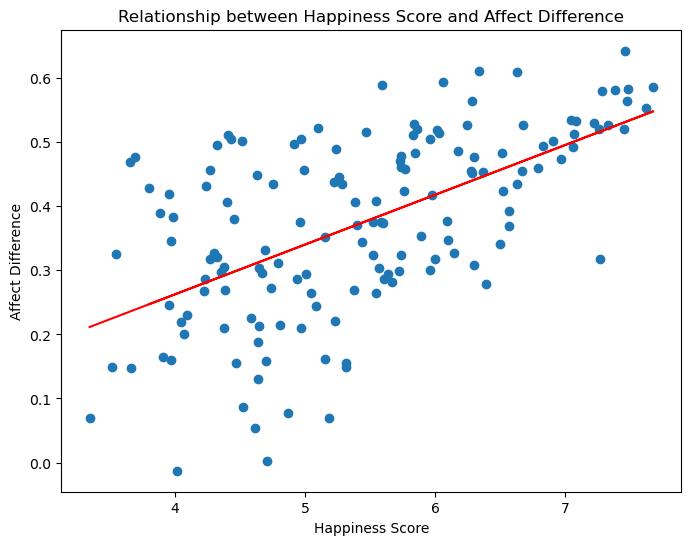

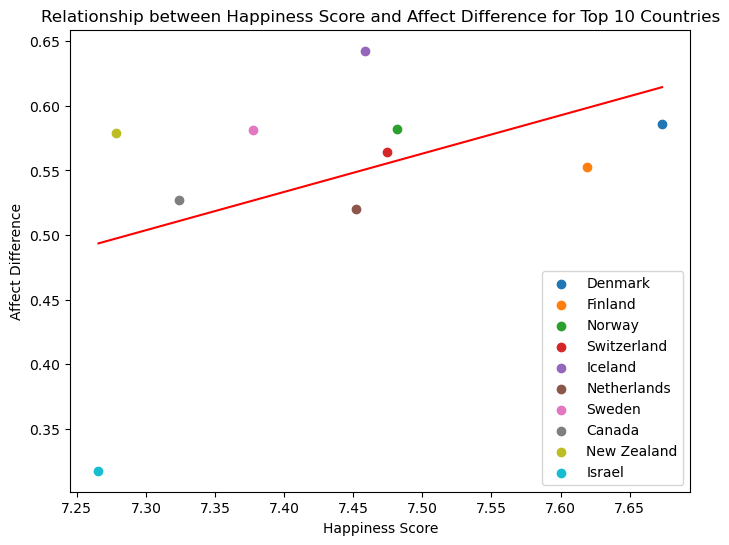

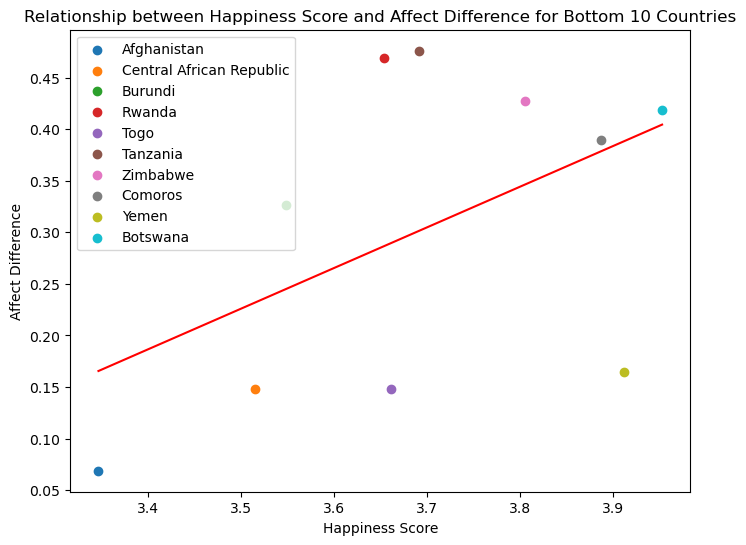

In [20]:
# Create a scatter plot to show the relationship between the Happiness Score and Affect Difference for all countries
plt.figure(figsize=(8, 6))
plt.scatter(affect_agg['Happiness Score'], affect_agg['Affect Difference'])
plt.xlabel('Happiness Score')
plt.ylabel('Affect Difference')
plt.title('Relationship between Happiness Score and Affect Difference')

# Perform linear regression on all data points
X = np.array(affect_agg['Happiness Score']).reshape((-1, 1))
y = np.array(affect_agg['Affect Difference'])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

plt.show()


# Create a scatter plot to show the relationship between the Happiness Score and Affect Difference for top 10 countries
plt.figure(figsize=(8, 6))
for country in top_countries:
    country_data = affect_agg[affect_agg['Country Name'] == country]
    plt.scatter(country_data['Happiness Score'], country_data['Affect Difference'], label=country)

plt.xlabel('Happiness Score')
plt.ylabel('Affect Difference')
plt.title('Relationship between Happiness Score and Affect Difference for Top 10 Countries')
plt.legend()

# Perform linear regression for top 10 countries
X_top = np.array([affect_agg[affect_agg['Country Name'] == c]['Happiness Score'].mean() for c in top_countries]).reshape((-1, 1))
y_top = np.array([affect_agg[affect_agg['Country Name'] == c]['Affect Difference'].mean() for c in top_countries])
model_top = LinearRegression().fit(X_top, y_top)
y_top_pred = model_top.predict(X_top)
plt.plot(X_top, y_top_pred, color='red')

plt.show()


# Create a scatter plot to show the relationship between the Happiness Score and Affect Difference for bottom 10 countries
plt.figure(figsize=(8, 6))
for country in bottom_countries:
    country_data = affect_agg[affect_agg['Country Name'] == country]
    plt.scatter(country_data['Happiness Score'], country_data['Affect Difference'], label=country)

plt.xlabel('Happiness Score')
plt.ylabel('Affect Difference')
plt.title('Relationship between Happiness Score and Affect Difference for Bottom 10 Countries')
plt.legend()

# Perform linear regression for bottom 10 countries
X_bottom = np.array([affect_agg[affect_agg['Country Name'] == c]['Happiness Score'].mean() for c in bottom_countries]).reshape((-1, 1))
y_bottom = np.array([affect_agg[affect_agg['Country Name'] == c]['Affect Difference'].mean() for c in bottom_countries])
model_bottom = LinearRegression().fit(X_bottom, y_bottom)
y_bottom_pred = model_bottom.predict(X_bottom)
plt.plot(X_bottom, y_bottom_pred, color='red')

plt.show()


In [21]:
corr_coeff, p_value = pearsonr(affect_agg['Happiness Score'], affect_agg['Affect Difference'])

print(f"Pearson correlation coefficient: {corr_coeff:.2f}")
print(f"p-value: {p_value:.2f}")


Pearson correlation coefficient: 0.58
p-value: 0.00


In [23]:
# after running for 2022, realized there is NO DATA FOR 2022 . . . so using 2021
# Extract the desired columns from happiness_df
gdpconf_df = worldHappinessData.loc[worldHappinessData["Year"] == 2021,["Country Name","Log GDP Per Capita","Confidence In National Government"]]

In [24]:
gdpconf_df.head()

,Country Name,Log GDP Per Capita,Confidence In National Government
12,Afghanistan,7.324032,0.255620
27,Albania,9.583207,0.472924
38,Algeria,9.309262,NaN
58,Argentina,9.977073,0.326574
74,Armenia,9.560513,0.297146


In [25]:
#need to remove the NaNs
gdpconf_final_df = gdpconf_df.dropna()
gdpconf_final_df

,Country Name,Log GDP Per Capita,Confidence In National Government
12,Afghanistan,7.324032,0.255620
27,Albania,9.583207,0.472924
58,Argentina,9.977073,0.326574
74,Armenia,9.560513,0.297146
90,Australia,10.815255,0.519226
...,...,...,...
2086,United States,11.061464,0.404625
2103,Uruguay,10.034546,0.485831
2119,Uzbekistan,8.953489,0.912673
2181,Zambia,8.082337,0.697678


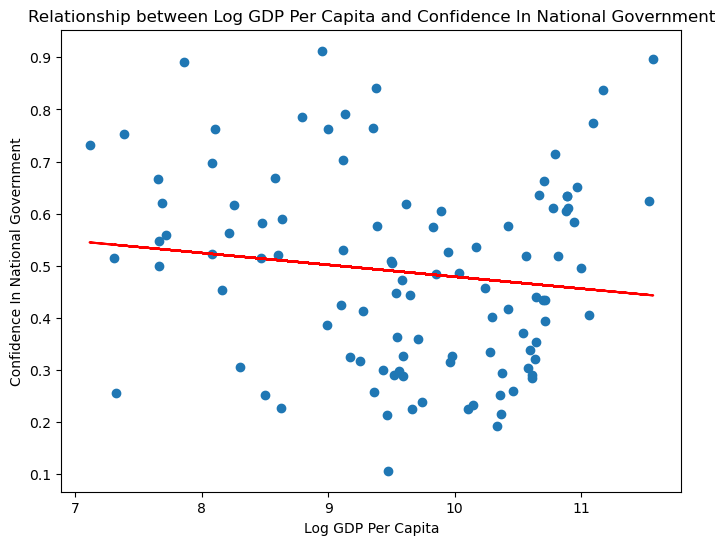

In [92]:
# Create a scatter plot to show the relationship between Log GDP Per Capita and Confidence in National Gov for all countries
plt.figure(figsize=(8, 6))
plt.scatter(gdpconf_final_df['Log GDP Per Capita'], gdpconf_final_df['Confidence In National Government'])
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Confidence In National Government')
plt.title('Relationship between Log GDP Per Capita and Confidence In National Government')
# Perform linear regression on all data points
X = np.array(gdpconf_final_df['Log GDP Per Capita']).reshape((-1, 1))
y = np.array(gdpconf_final_df['Confidence In National Government'])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')
plt.show()


In [93]:
corr_coeff, p_value = pearsonr(gdpconf_final_df['Log GDP Per Capita'], gdpconf_final_df['Confidence In National Government'])

print(f"Pearson correlation coefficient: {corr_coeff:.2f}")
print(f"p-value: {p_value:.2f}")

Pearson correlation coefficient: -0.13
p-value: 0.17


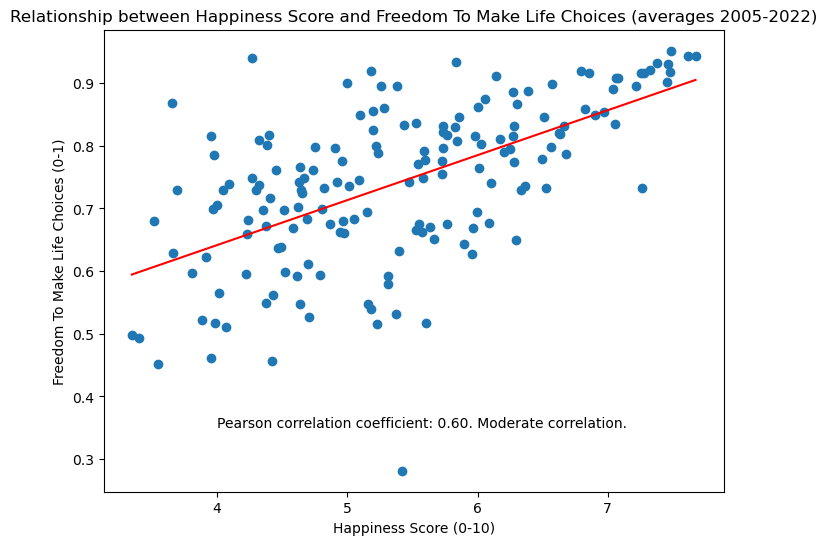

<Figure size 640x480 with 0 Axes>

In [144]:
# Create a scatter plot to show the relationship between the Happiness Score and Freedom to make Life Choices
# For each country, use their average scores
plt.figure(figsize=(8, 6))
ret = plt.scatter(averagesSorted['Life Ladder'], averagesSorted['Freedom To Make Life Choices'])
plt.xlabel('Happiness Score (0-10)')
plt.ylabel('Freedom To Make Life Choices (0-1)')
plt.title('Relationship between Happiness Score and Freedom To Make Life Choices (averages 2005-2022)')

# Perform linear regression on all data points
x_values = averagesSorted['Life Ladder']
y_values = averagesSorted['Freedom To Make Life Choices']
corr = pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
anno_text = f"Pearson correlation coefficient: {corr.statistic:.2f}. Moderate correlation."
plt.annotate(anno_text, (4,.35))
plt.show()
plt.savefig("Output/Freedom")

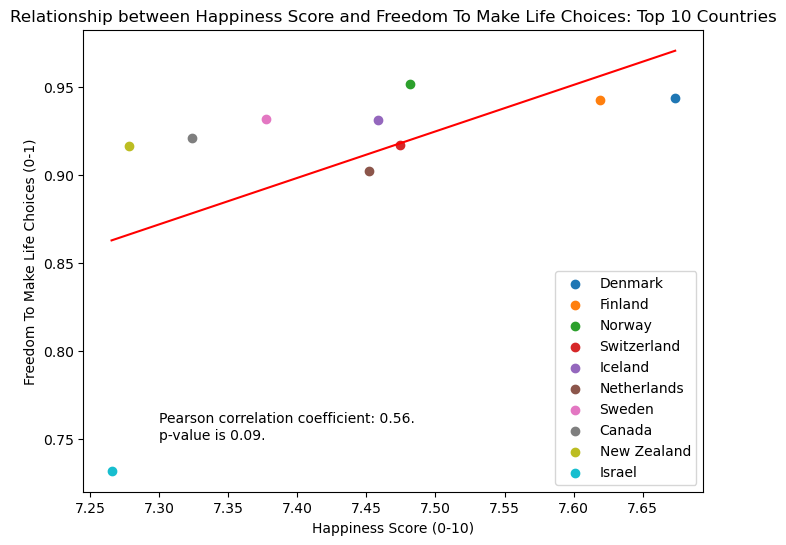

<Figure size 640x480 with 0 Axes>

In [147]:
# Get top 10 and bottom 10 countries based on average happiness score and average Freedom score
top10 = averagesSorted.iloc[0:10]
bottom10 = averagesSorted.iloc[-10:]

# Create a scatter plot to show the relationship between the Happiness Score and Freedom to Make Life Choices 
# for the top 10 countries
plt.figure(figsize=(8, 6))
for index, row in top10.iterrows():
    plt.scatter(row['Life Ladder'], row['Freedom To Make Life Choices'], label=row['Country Name'])

plt.xlabel('Happiness Score (0-10)')
plt.ylabel('Freedom To Make Life Choices (0-1)')
plt.title('Relationship between Happiness Score and Freedom To Make Life Choices: Top 10 Countries')
plt.legend()

# Perform linear regression for top 10 countries
x_values = top10['Life Ladder']
y_values = top10['Freedom To Make Life Choices']
corr = pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
anno_text = f"Pearson correlation coefficient: {corr.statistic:.2f}."
anno_text += "\np-value is " + f"{corr.pvalue:.2f}."
plt.annotate(anno_text, (7.3,.75))
plt.show()
plt.savefig("Output/FreedomTop10")

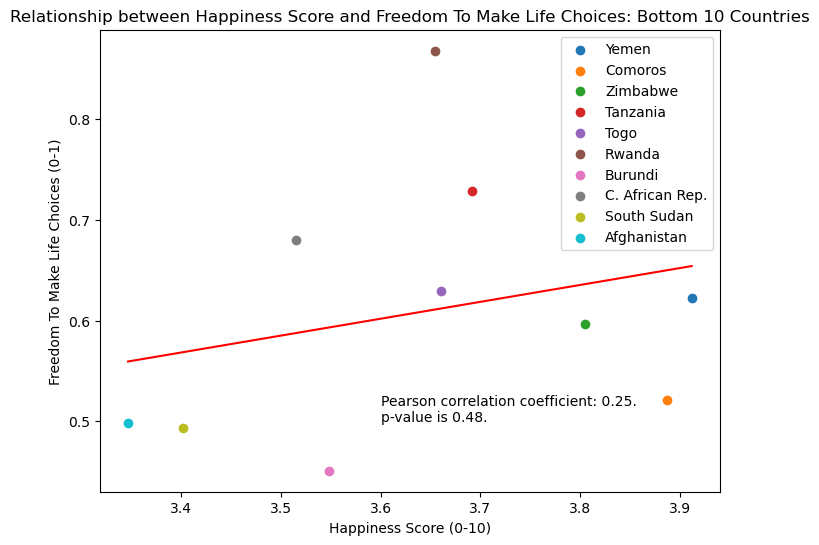

<Figure size 640x480 with 0 Axes>

In [148]:
# Create a scatter plot to show the relationship between the Happiness Score and Freedom to Make Life Choices 
# for the top 10 countries
plt.figure(figsize=(8, 6))
for index, row in bottom10.iterrows():
    plt.scatter(row['Life Ladder'], row['Freedom To Make Life Choices'], label=row['Country Name'])

plt.xlabel('Happiness Score (0-10)')
plt.ylabel('Freedom To Make Life Choices (0-1)')
plt.title('Relationship between Happiness Score and Freedom To Make Life Choices: Bottom 10 Countries')
plt.legend()

# Perform linear regression for top 10 countries
x_values = bottom10['Life Ladder']
y_values = bottom10['Freedom To Make Life Choices']
corr = pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values,"r-")
anno_text = f"Pearson correlation coefficient: {corr.statistic:.2f}."
anno_text += "\np-value is " + f"{corr.pvalue:.2f}."
plt.annotate(anno_text, (3.6,.5))
plt.show()
plt.savefig("Output/FreedomBottom10")
